In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
fashion_mnist_test = pd.read_csv("fashion-mnist_test.csv")
fashion_mnist_train = pd.read_csv("fashion-mnist_train.csv")

In [ ]:
fashion_mnist_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

from IPython.display import SVG
from graphviz import Source
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

*斜体文本*#### Create Train and Test set.

In [ ]:
X_train=fashion_mnist_train.drop(columns='label').values.astype('int')
y_train=fashion_mnist_train['label'].values.astype('int')
X_test=fashion_mnist_test.drop(columns='label').values.astype('int')
y_test=fashion_mnist_test['label'].values.astype('int')

![替代文字](https://)### Create a plot learning curve function

In [ ]:
# plot learning curve function
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X :X_Train

    y : y_Train

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

#### Compare 5 Classifiers Accuracy ,Time Spend and Learning Curve: KNN,ExtraTree,DecisionTree,RandomForest,GradientBoost

> 缩进块

> 缩进块





KNeighborsClassifier took 20.168677 seconds, accuracy = 0.797154 .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier took 0.220793 seconds, accuracy = 0.803512 .
DecisionTreeClassifier took 1.536596 seconds, accuracy = 0.724190 .


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier took 0.407791 seconds, accuracy = 0.811081 .
GradientBoostingClassifier took 111.718406 seconds, accuracy = 0.839540 .


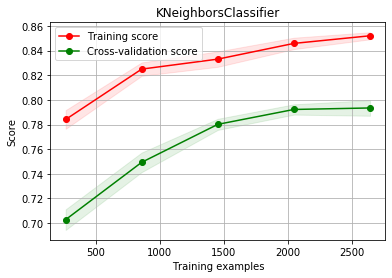

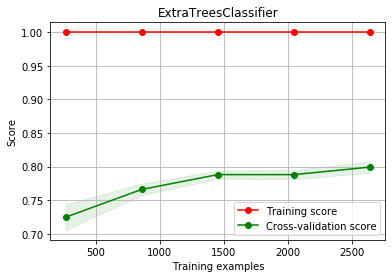

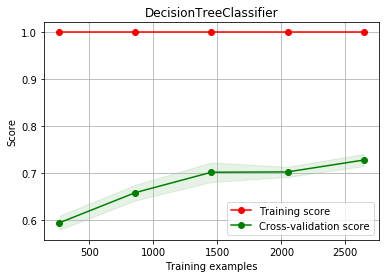

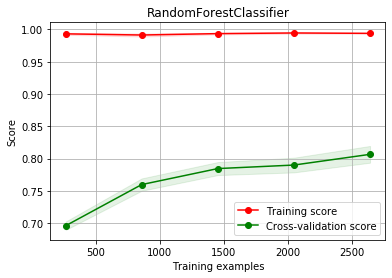

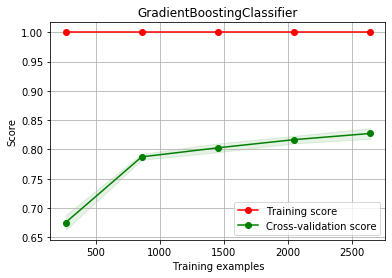

In [ ]:
# YOUR CODE HERE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import time
knn_clf = KNeighborsClassifier()
etc_clf = ExtraTreesClassifier()
rfc_clf = RandomForestClassifier()
dtc_clf = DecisionTreeClassifier()
gbr_clf = GradientBoostingClassifier()


for clf in (knn_clf,etc_clf,dtc_clf,rfc_clf,gbr_clf):
    time_start_1 = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test);
    classifiername= clf.__class__.__name__
    timespend= time.time()- time_start_1
    score=accuracy_score(y_test, y_pred)
    print("%s took %f seconds, accuracy = %f ." % (classifiername,timespend,score));
    plot_learning_curve(clf, clf.__class__.__name__, X_train, y_train, ylim=None, cv=5, n_jobs=10)

plt.show()


1.   KNeighborsClassifier took 20.168677 seconds, accuracy = 0.797154
2.   ExtraTreesClassifier took 0.220793 seconds, accuracy = 0.803512
3.   DecisionTreeClassifier took 1.536596 seconds, accuracy = 0.724190
4.   RandomForestClassifier took 0.407791 seconds, accuracy = 0.811081
5.   GradientBoostingClassifier took 111.718406 seconds, accuracy = 0.839540 .


 .
(Note: In Kaggle and local notebook, these accuracy score should be better than these in Google Colaboratory, but it will take too long to finish. Google Colaboratory takes less time but low performance.)


**From the result we can see here , the best model here is gradientboosting, its learning curve is the best here , with low variance. But it took the longest time**

#### Choose the best one: GradientBoost  to do a Grid search over parameters to 

*   列表项
*   列表项

optimize

In [ ]:
# because it takes too long we just do a few search.
parameters={'max_depth' : (3,5,10),'n_estimators':(50,100)}
clf=GridSearchCV(gbr_clf,parameters)
clf

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [ ]:
#predict
y_pred = clf.fit(X_train, y_train).predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix :')
print (cm) 
print ('Accuracy Score :',accuracy_score(y_test,y_pred) )
print ('Report : ')
print (classification_report(y_test,y_pred) )
print("Best parameters set found on development set:")
print()
print(clf.best_params_)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Confusion Matrix :
[[255   1   4  22   5   1  38   0   3   0]
 [  1 294   3   9   0   1   3   0   0   0]
 [  5   0 239   1  51   1  31   0   1   0]
 [ 10   3   3 303   9   0  13   0   0   0]
 [  0   0  35  12 265   0  21   0   0   0]
 [  0   0   0   0   0 304   1  16   1  17]
 [ 62   0  38   6  28   0 203   0   5   0]
 [  0   0   0   0   0   7   0 280   0  21]
 [  0   0   2   4   1   1   8   0 306   1]
 [  0   0   1   0   0   2   0  19   0 326]]
Accuracy Score : 0.8401453224341507
Report : 
              precision    recall  f1-score   support

           0       0.77      0.78      0.77       329
           1       0.99      0.95      0.97       311
           2       0.74      0.73      0.73       329
           3       0.85      0.89      0.87       341
           4       0.74      0.80      0.77       333
           5       0.96      0.90      0.93       339
           6       0.64      0.59      0.62       342
           7       0.89      0.91      0.90       308
           8     

After Grid Search, Gradient Boosting Accuracy increase from 0.8395 to 0.8401.

The most accuracy is for label '0' then the label '8' and label '5'. Probably because '1' is very easy to indentify.

The best parameter here for GradientBoostingClassifier is {'max_depth': 5, 'n_estimators': 100}
